<a href="https://colab.research.google.com/github/akashksingh4765/AI-Driven-NDT-Inspection-/blob/main/YOLO_MODEL(Akash).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(Yolo) Model_Akash Kumar singh (Nit Trichy)

# 1) Verify NVIDIA GPU Availability

# 1) First open anaconda Prompt then type : conda create --name yolo-env1 python=3.12
# 2)  activate env1 : conda activate yolo-env1
# 3)

In [29]:
!nvidia-smi

Mon Oct 27 15:24:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# 2) Upload Image Dataset and Prepare Training Data

# 3) or Copy from Google Drive :

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp /content/gdrive/MyDrive/path/to/data.zip /content

# 4) Unzip images to a custom data folder

In [30]:
!unzip -q /content/data.zip -d /content/custom_data


# 5) Dataset allotment  Trial version
°Training
°Validation

In [31]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/akashksingh4765/AI-Driven-NDT-Inspection-/ea3e153646036a64bff3e0f1b874af84ca0e43be/train_val_split.py

# TO DO: Improve robustness of train_val_split.py script so it can handle nested data folders, etc
!python /content/train_val_split.py --datapath="/content/custom_data" --train_pct=0.82







--2025-10-27 15:24:17--  https://raw.githubusercontent.com/akashksingh4765/AI-Driven-NDT-Inspection-/ea3e153646036a64bff3e0f1b874af84ca0e43be/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-10-27 15:24:18 (57.3 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]

Number of image files: 100
Number of annotation files: 100
Images moving to train: 82
Images moving to validation: 18


# 6) Install Requirements (Ultralytics)

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.2 MB/s eta 0:00:00


# 7) Configure Training

In [ ]:
# Python function to automatically create data.yaml config file
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Writes data in YAML format to data.yaml

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 5
names:
- Debonding
- Delamination
- Impact Damage/Crushed Core
- Porosity
- Resin rich/Resin-Starved zone


# 8) Train Model

In [ ]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=30 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.209 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj

# 9) Test Model

In [ ]:
!yolo detect predict model=/content/runs/detect/train/weights/best.pt source=data/validation/images save=True


Ultralytics 8.3.209 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,735 parameters, 0 gradients, 21.3 GFLOPs

image 1/18 /content/data/validation/images/2b502be3-49_thermo.png: 640x640 2 Impact Damage/Crushed Cores, 1 Porosity, 22.6ms
image 2/18 /content/data/validation/images/3369b010-37_thermo.png: 640x640 2 Porositys, 2 Resin rich/Resin-Starved zones, 15.6ms
image 3/18 /content/data/validation/images/3cef0807-32_thermo.png: 640x640 1 Debonding, 1 Impact Damage/Crushed Core, 1 Porosity, 1 Resin rich/Resin-Starved zone, 15.6ms
image 4/18 /content/data/validation/images/400fa433-64_thermo.png: 640x640 1 Porosity, 1 Resin rich/Resin-Starved zone, 15.5ms
image 5/18 /content/data/validation/images/51a8635e-5_thermo.png: 640x640 1 Impact Damage/Crushed Core, 15.5ms
image 6/18 /content/data/validation/images/52a26ee0-13_thermo.png: 640x640 1 Resin rich/Resin-Starved zone, 15.5ms
image 7/18 /content/data/validation/images/5f4012c6-78_

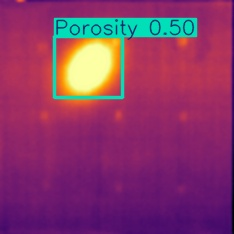

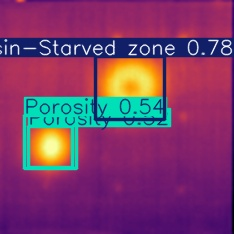

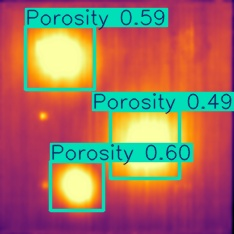

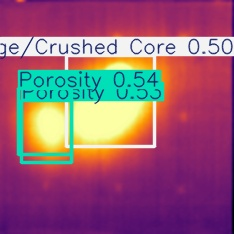

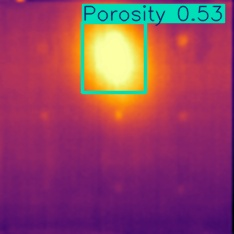

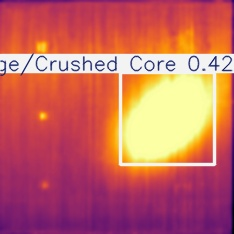

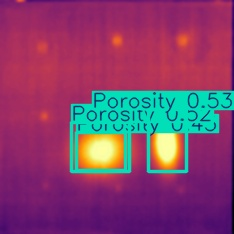

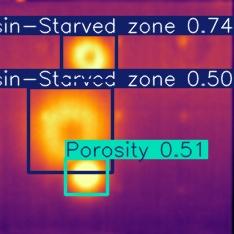

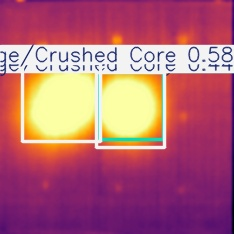

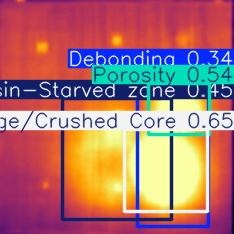

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


# 10) Download YOLO Model

In [ ]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model01
!cp /content/runs/detect/train5/weights/best.pt /content/my_model01/my_model01.pt
!cp -r /content/runs/detect/train /content/my_model01

# Zip into "my_model.zip"
%cd my_model01
!zip /content/my_model01.zip my_model01.pt
!zip -r /content/my_model01.zip train
%cd /content

cp: cannot stat '/content/runs/detect/train5/weights/best.pt': No such file or directory
/content/my_model01
	zip warning: name not matched: my_model01.pt

zip error: Nothing to do! (/content/my_model01.zip)
  adding: train/ (stored 0%)
  adding: train/results.png (deflated 6%)
  adding: train/train_batch122.jpg (deflated 11%)
  adding: train/train_batch121.jpg (deflated 13%)
  adding: train/BoxP_curve.png (deflated 10%)
  adding: train/val_batch0_pred.jpg (deflated 12%)
  adding: train/BoxPR_curve.png (deflated 15%)
  adding: train/BoxF1_curve.png (deflated 11%)
  adding: train/results.csv (deflated 59%)
  adding: train/BoxR_curve.png (deflated 13%)
  adding: train/train_batch0.jpg (deflated 8%)
  adding: train/confusion_matrix_normalized.png (deflated 20%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/last.pt (deflated 8%)
  adding: train/weights/best.pt (deflated 8%)
  adding: train/train_batch1.jpg (deflated 8%)
  adding: train/val_batch0_labels.jpg (deflated 12%)
  

# 11)  Deploy on PC (Windows)

# conda activate yolo-env1


# cd path/to/folder

[link text](https://)pip install ultralytics# New Section



#if already downloaded then use : pip install --no-index --find-links=. ultralytics


#Install pYtorch:
 pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

 # if already downloaded then :
  pip install --no-index --find-links=. torch torchvision torchaudio




# Download the yolo_detect.py script into the my_model folder using:
curl -o yolo_detect.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/yolo_detect.py

# if already present on desktop then no need to download it ***

# To run inference with a yolo on a USB camera at 1280x720 resolution, issue:

python yolo_detect.py --model my_model.pt --source usb0 --resolution 1280x720

if saved video is there then use : python yolo_detect.py --model "C:\Users\vikas\Desktop\Nit Project-review 1\my_model01\train\weights\best.pt" --source "C:\Users\vikas\Desktop\video121\Thermographic Inspection Video(Flir)_thermo.mp4" --resolution 1280x720
